In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulating the A/B Test data
np.random.seed(42)  # For reproducibility

# Sample size (number of users visiting each version of the website)
sample_size = 1000

# Conversion rates for both versions (simulated)
# Version A (original) - average conversion rate 10% (0.1)
# Version B (new design) - average conversion rate 12% (0.12)
conversions_a = np.random.binomial(1, 0.10, sample_size)  # 10% conversion rate for Version A
conversions_b = np.random.binomial(1, 0.12, sample_size)  # 12% conversion rate for Version B

In [2]:
# 1. Calculate Conversion Rates for both versions
conversion_rate_a = np.mean(conversions_a)
conversion_rate_b = np.mean(conversions_b)

print(f"Conversion Rate for Version A (Original): {conversion_rate_a * 100:.2f}%")
print(f"Conversion Rate for Version B (New Design): {conversion_rate_b * 100:.2f}%")

Conversion Rate for Version A (Original): 10.00%
Conversion Rate for Version B (New Design): 11.20%


In [3]:
# 2. Perform Hypothesis Test (Two-sample t-test)
# Null Hypothesis (H0): There is no significant difference between the conversion rates of the two versions.
# Alternative Hypothesis (H1): The conversion rate of Version B is greater than Version A.

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(conversions_a, conversions_b, alternative='greater')

print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -0.8714
P-value: 0.8082


In [4]:
# 3. Determine if we reject the null hypothesis
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nWe reject the null hypothesis. The new design (Version B) significantly increases conversions.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant difference in conversion rates.")


We fail to reject the null hypothesis. There is no significant difference in conversion rates.


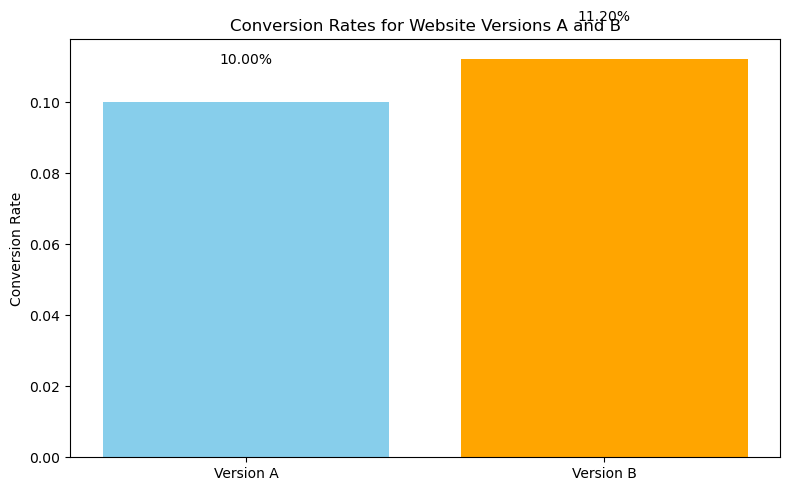

In [5]:
# 4. Visualization - Plot the conversion rates for both versions
plt.figure(figsize=(8, 5))

# Plot the conversion rates for both versions
versions = ['Version A', 'Version B']
conversion_rates = [conversion_rate_a, conversion_rate_b]

plt.bar(versions, conversion_rates, color=['skyblue', 'orange'])
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates for Website Versions A and B')

# Display the conversion rates on top of the bars
for i, v in enumerate(conversion_rates):
    plt.text(i, v + 0.01, f'{v * 100:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()